In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [43]:
df = pd.read_csv("D:/DATA ANALYTICS/SAMPLE/Smartphone_Usage_Productivity_Dataset_50000.csv")

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   User_ID                    50000 non-null  object 
 1   Age                        50000 non-null  int64  
 2   Gender                     50000 non-null  object 
 3   Occupation                 50000 non-null  object 
 4   Device_Type                50000 non-null  object 
 5   Daily_Phone_Hours          50000 non-null  float64
 6   Social_Media_Hours         50000 non-null  float64
 7   Work_Productivity_Score    50000 non-null  int64  
 8   Sleep_Hours                50000 non-null  float64
 9   Stress_Level               50000 non-null  int64  
 10  App_Usage_Count            50000 non-null  int64  
 11  Caffeine_Intake_Cups       50000 non-null  int64  
 12  Weekend_Screen_Time_Hours  50000 non-null  float64
dtypes: float64(4), int64(5), object(4)
memory usag

In [45]:
df.head()

,User_ID,Age,Gender,Occupation,Device_Type,Daily_Phone_Hours,Social_Media_Hours,Work_Productivity_Score,Sleep_Hours,Stress_Level,App_Usage_Count,Caffeine_Intake_Cups,Weekend_Screen_Time_Hours
0,U1,58,Male,Professional,Android,1.3,6.7,6,8.8,4,42,1,8.7
1,U2,25,Male,Professional,Android,1.2,1.5,5,6.4,1,51,3,5.1
2,U3,19,Male,Student,iOS,5.3,5.7,5,9.0,4,14,5,6.3
3,U4,35,Female,Business Owner,iOS,5.8,2.5,2,5.7,3,36,6,12.8
4,U5,33,Male,Freelancer,Android,7.9,1.3,4,5.7,3,37,5,9.9


In [46]:
df.describe()

,Age,Daily_Phone_Hours,Social_Media_Hours,Work_Productivity_Score,Sleep_Hours,Stress_Level,App_Usage_Count,Caffeine_Intake_Cups,Weekend_Screen_Time_Hours
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000
mean,39.034960,6.509116,4.267250,5.503760,6.497744,5.504500,32.43898,3.004580,8.006844
std,12.414877,3.170903,2.164743,2.874806,1.449551,2.871095,16.12151,1.996657,3.461300
min,18.000000,1.000000,0.500000,1.000000,4.000000,1.000000,5.00000,0.000000,2.000000
25%,28.000000,3.800000,2.400000,3.000000,5.200000,3.000000,18.00000,1.000000,5.000000
50%,39.000000,6.500000,4.300000,5.500000,6.500000,6.000000,32.00000,3.000000,8.000000
75%,50.000000,9.200000,6.100000,8.000000,7.800000,8.000000,46.00000,5.000000,11.000000
max,60.000000,12.000000,8.000000,10.000000,9.000000,10.000000,60.00000,6.000000,14.000000


In [47]:
df.isnull().sum()

User_ID                      0
Age                          0
Gender                       0
Occupation                   0
Device_Type                  0
Daily_Phone_Hours            0
Social_Media_Hours           0
Work_Productivity_Score      0
Sleep_Hours                  0
Stress_Level                 0
App_Usage_Count              0
Caffeine_Intake_Cups         0
Weekend_Screen_Time_Hours    0
dtype: int64

In [48]:
df["App_Usage_Count"].mean()

np.float64(32.43898)

In [49]:
df["Sleep_Hours"].min()

4.0

In [50]:
df.groupby("Occupation")['Device_Type'].value_counts()

Occupation      Device_Type
Business Owner  Android        6298
                iOS            6161
Freelancer      Android        6216
                iOS            6179
Professional    Android        6320
                iOS            6309
Student         iOS            6271
                Android        6246
Name: count, dtype: int64

In [51]:
df.groupby("Occupation")['Device_Type'].value_counts().sort_values()

Occupation      Device_Type
Business Owner  iOS            6161
Freelancer      iOS            6179
                Android        6216
Student         Android        6246
                iOS            6271
Business Owner  Android        6298
Professional    iOS            6309
                Android        6320
Name: count, dtype: int64

In [52]:
pd.crosstab(df["Occupation"], df["Device_Type"])

Device_Type,Android,iOS
Occupation,,
Business Owner,6298,6161
Freelancer,6216,6179
Professional,6320,6309
Student,6246,6271


In [53]:
np.mean(df["Daily_Phone_Hours"])


np.float64(6.509116000000001)

In [54]:
np.max(df["Daily_Phone_Hours"])


12.0

In [55]:
np.min(df["Daily_Phone_Hours"])

1.0

In [56]:
avg_phone_usage = df.groupby("Gender")["Daily_Phone_Hours"].mean()

In [57]:
avg_phone_usage

Gender
Female    6.509989
Male      6.522696
Other     6.494583
Name: Daily_Phone_Hours, dtype: float64

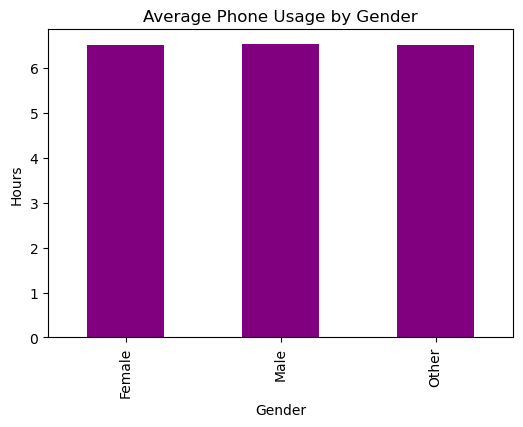

In [58]:
plt.figure(figsize=(6,4))
avg_phone_usage.plot(kind='bar',color='purple')
plt.title("Average Phone Usage by Gender")
plt.xlabel("Gender")
plt.ylabel("Hours")
plt.show()

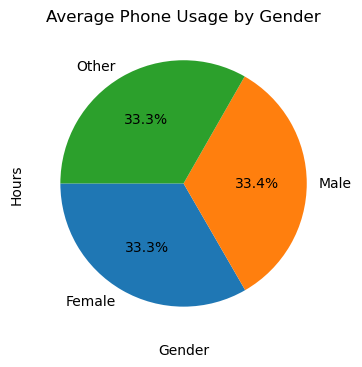

In [59]:
plt.figure(figsize=(6,4))
avg_phone_usage.plot(kind='pie',autopct='%1.1f%%',startangle=180)
plt.title("Average Phone Usage by Gender")
plt.xlabel("Gender")
plt.ylabel("Hours")
plt.show()

In [60]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])

In [61]:
corr_matrix = numeric_df.corr()

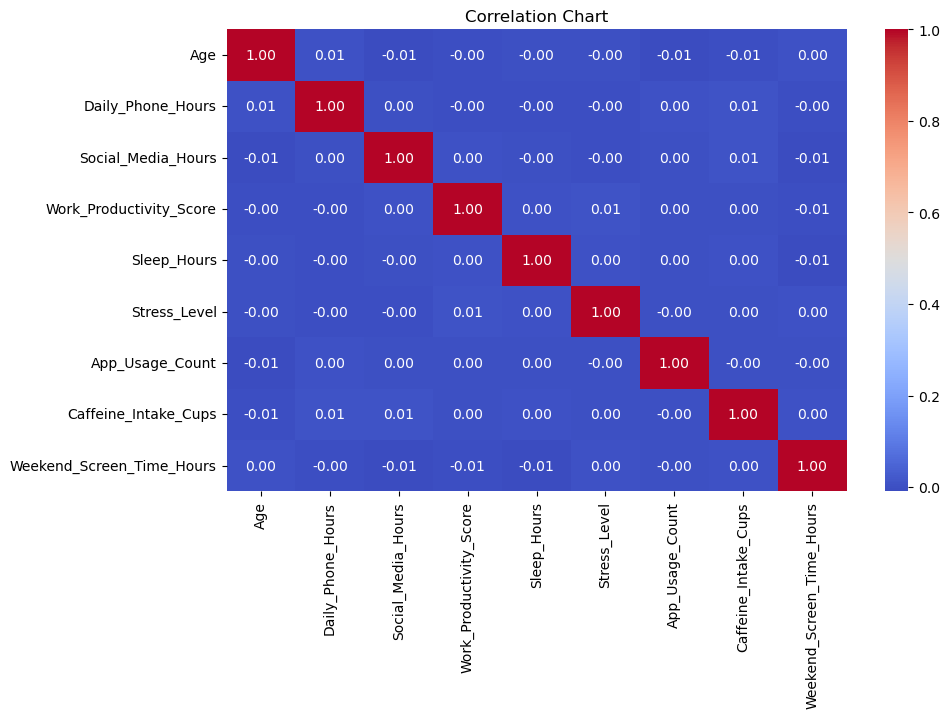

In [62]:
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix , annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Chart')
plt.show()

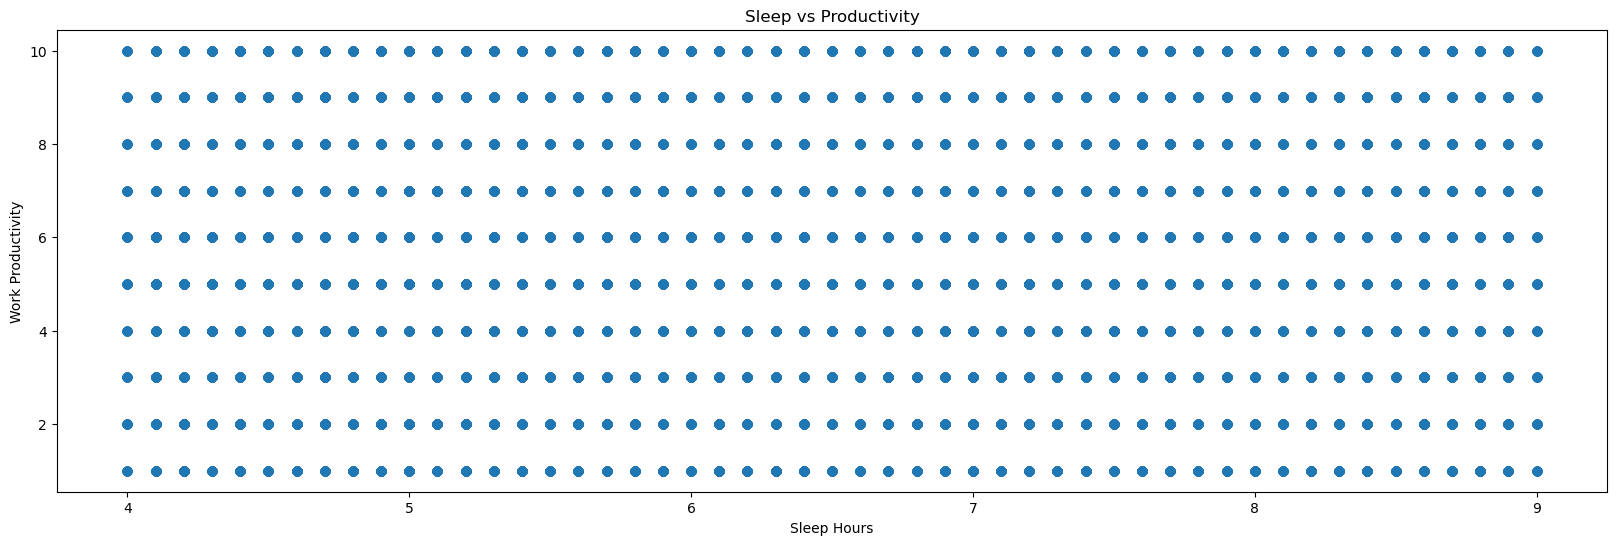

In [63]:
plt.figure(figsize=(20,6))
plt.scatter(df["Sleep_Hours"], df["Work_Productivity_Score"])
plt.xlabel("Sleep Hours")
plt.ylabel("Work Productivity")
plt.title("Sleep vs Productivity")
plt.show()

In [64]:
df.sort_values(by="Sleep_Hours", ascending=True).head(10)

,User_ID,Age,Gender,Occupation,Device_Type,Daily_Phone_Hours,Social_Media_Hours,Work_Productivity_Score,Sleep_Hours,Stress_Level,App_Usage_Count,Caffeine_Intake_Cups,Weekend_Screen_Time_Hours
32475,U32476,51,Male,Freelancer,Android,2.2,4.6,8,4.0,6,19,4,5.8
17566,U17567,56,Male,Business Owner,Android,7.8,2.0,6,4.0,6,60,1,10.2
17569,U17570,48,Other,Freelancer,Android,10.1,3.1,5,4.0,6,33,0,7.5
41069,U41070,35,Female,Professional,Android,6.9,4.2,7,4.0,7,11,1,3.3
3702,U3703,18,Other,Student,Android,1.7,7.3,10,4.0,3,52,1,10.3
48784,U48785,48,Female,Student,iOS,5.4,1.2,1,4.0,6,21,3,10.6
31476,U31477,58,Other,Freelancer,iOS,6.3,7.1,3,4.0,9,13,3,3.9
1078,U1079,39,Other,Student,Android,2.9,3.5,1,4.0,3,9,2,3.3
48819,U48820,37,Male,Freelancer,Android,3.1,7.8,1,4.0,10,19,3,3.8
7578,U7579,57,Other,Business Owner,Android,4.3,1.4,8,4.0,4,40,2,4.6
